In [1]:
import os
from xml.etree import ElementTree as ET
import matplotlib.pyplot as plt
import cv2
import numpy as np
import shutil
import random

**Imague Augmentation using Gaussian Blur**

In [2]:
def gaussian_blur_augmentation(image_path, bboxes, sigma=6):
    image = cv2.imread(image_path)
    height, width, _ = image.shape
    
    # blended_image = np.zeros((height, width, 3), dtype=np.uint8)
    mask = np.zeros((height, width, 3), dtype=np.uint8)
    
    for bbox in bboxes:
        xmin, ymin, xmax, ymax = bbox
        mask[ymin:ymax, xmin:xmax, :] = 1
    inverted_mask = 1 - mask
    # image = image / 255.0
    blurred_image = cv2.GaussianBlur(image, (0,0), sigma)
    blended_image = (blurred_image * inverted_mask + image * mask)
    
    return blended_image

In [3]:
img_path = 'merged_data/train/images/Norway_002675.jpg'
xml_path = 'merged_data/train/xmls/Norway_002675.xml'

def bbox_extract(bndbox):
    xmin = int(eval(bndbox.find('xmin').text))
    ymin = int(eval(bndbox.find('ymin').text))
    xmax = int(eval(bndbox.find('xmax').text))
    ymax = int(eval(bndbox.find('ymax').text))

    return [xmin, ymin, xmax, ymax]

for files in os.listdir(xml_path):
    tree = ET.parse(open(xml_path + '/' + files))
    root = tree.getroot()

    bbox = []

    for obj in root.iter('object'):
        if obj.find('name').text == 'D00':
            bndbox = obj.find('bndbox')
            box = bbox_extract(bndbox)
            bbox.append(box)
        elif obj.find('name').text == 'D10':
            bndbox = obj.find('bndbox')
            box = bbox_extract(bndbox)
            bbox.append(box)
        elif obj.find('name').text == 'D20':
            bndbox = obj.find('bndbox')
            box = bbox_extract(bndbox)
            bbox.append(box)
        elif obj.find('name').text == 'D40':
            bndbox = obj.find('bndbox')
            box = bbox_extract(bndbox)
            bbox.append(box)

    aug_img = img_path + '/' + files.split('.')[0] + '.jpg'

    img = gaussian_blur_augmentation(aug_img, bbox)

    # output_path = os.path.join('aug_images/train/images', files.split('.')[0] + '.jpg')

    # if not os.path.exists(output_path):
    #     cv2.imwrite(output_path,img)

    plt.figure(figsize=(10,10))
    for box in bbox:
        xmin, ymin, xmax, ymax = box
        cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0,0,255), 1)
    plt.imshow(img)
    plt.show()

NotADirectoryError: [WinError 267] The directory name is invalid: 'merged_data/train/xmls/Norway_002675.xml'

Convert the VOC format to YOLO format by using this following command:

**python ./convert2Yolo/example.py --datasets VOC --img_path ./aug_images/train/images --label ./merged_all/train/xmls --convert_output_path ./aug_images/train/labels --img_type '.jpg' --manifest_path ./ --cls_list_file ./voc.names**

The next cell will clean the files if there are any None values in the annotated text files.

In [3]:
def is_file_not_empty(file_path):
    return os.path.isfile(file_path) and os.path.getsize(file_path) > 0

def clean_txt_yolo(txt_path, img_path):
    for files in os.listdir(txt_path):
        with open(txt_path + '/' + files, 'r') as f:
            filtered_lines = filter(lambda line: "None" not in line, f)
            filtered_lines = list(filtered_lines)

        with open(txt_path + '/' + files, 'w') as f:
            f.writelines(filtered_lines)

        if is_file_not_empty(txt_path + '/' + files):
            print('{} is not empty'.format(files))
            pass
        else:
            img_file = img_path + '/' + files.split('.')[0] + '.jpg'
            txt_file = txt_path + '/' + files
            os.remove(img_file)
            os.remove(txt_file)

train_clean = clean_txt_yolo(txt_path='Merged_data/train/labels', 
                            img_path ='Merged_data/train/images')
# validation_clean = clean_txt_yolo(txt_path ='/content/drive/MyDrive/merged_data/validation/labels', 
#                                 img_path ='/content/drive/MyDrive/merged_data/validation/images')

China_Drone_000000.txt is not empty
China_Drone_000001.txt is not empty
China_Drone_000002.txt is not empty
China_Drone_000003.txt is not empty
China_Drone_000004.txt is not empty
China_Drone_000005.txt is not empty
China_Drone_000006.txt is not empty
China_Drone_000007.txt is not empty
China_Drone_000008.txt is not empty
China_Drone_000009.txt is not empty
China_Drone_000010.txt is not empty
China_Drone_000011.txt is not empty
China_Drone_000012.txt is not empty
China_Drone_000013.txt is not empty
China_Drone_000014.txt is not empty
China_Drone_000015.txt is not empty
China_Drone_000016.txt is not empty
China_Drone_000017.txt is not empty
China_Drone_000018.txt is not empty
China_Drone_000019.txt is not empty
China_Drone_000020.txt is not empty
China_Drone_000021.txt is not empty
China_Drone_000022.txt is not empty
China_Drone_000024.txt is not empty
China_Drone_000026.txt is not empty
China_Drone_000027.txt is not empty
China_Drone_000030.txt is not empty
China_Drone_000031.txt is no

**Split the dataset into training and validation.**

In [5]:
china_drone_count = 0
china_bike_count = 0
czech_count = 0
india_count = 0
norway_count = 0
us_count = 0
japan_count = 0

for files in os.listdir('Merged_data/train/images'):
    if files.startswith('China_Drone'):
        china_drone_count += 1
    if files.startswith('China_MotorBike'):
        china_bike_count += 1
    if files.startswith('Czech'):
        czech_count += 1
    if files.startswith('India'):
        india_count += 1
    if files.startswith('Norway'):
        norway_count += 1
    if files.startswith('United_States'):
        us_count += 1
    if files.startswith('Japan'):
        japan_count += 1

print("Split Size for China Drone: {}".format(int(china_drone_count - china_drone_count*0.8)))
print("Split Size for China Motorbike: {}".format(int(china_bike_count - china_bike_count*0.8)))
print("Split Size for Czech: {}".format(int(czech_count - czech_count*0.8)))
print("Split Size for India: {}".format(int(india_count - india_count*0.8)))
print("Split Size for Norway: {}".format(int(norway_count - norway_count*0.8)))
print("Split Size for United States: {}".format(int(us_count - us_count*0.8)))
print("Split Size for Japan: {}".format(int(japan_count - japan_count*0.8)))

Split Size for China Drone: 383
Split Size for China Motorbike: 386
Split Size for Czech: 214
Split Size for India: 644
Split Size for Norway: 582
Split Size for United States: 961
Split Size for Japan: 1580


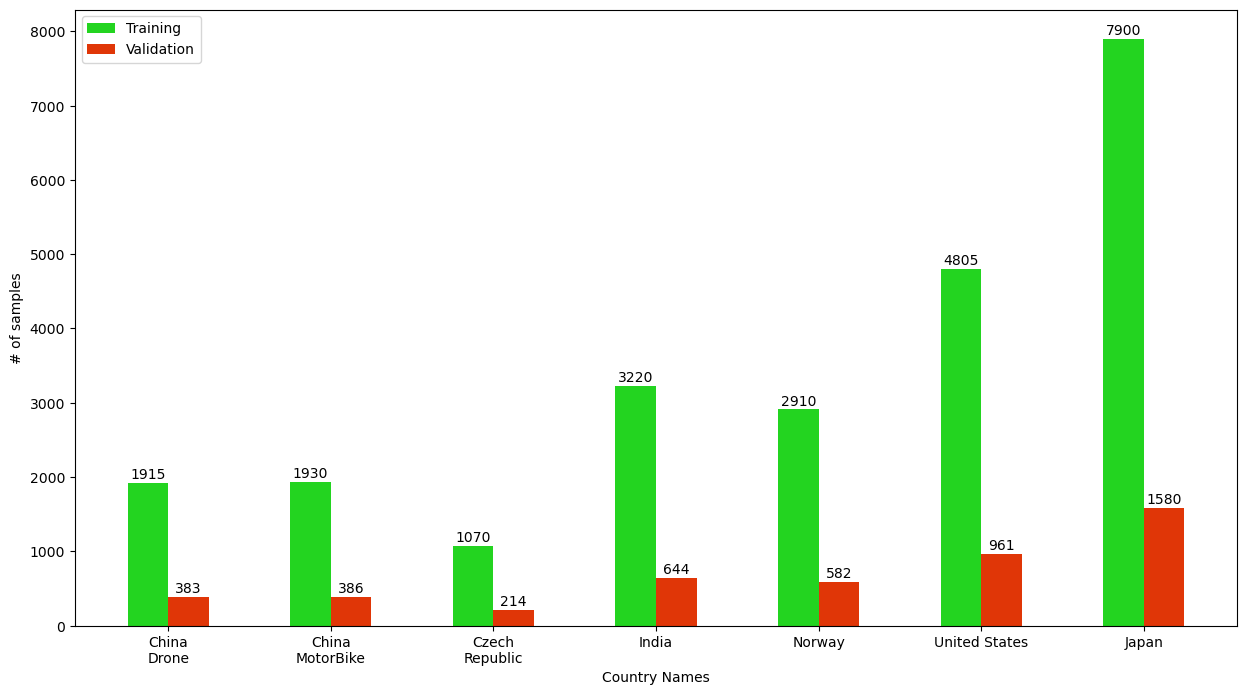

In [4]:
name = ('China\nDrone', 'China\nMotorBike', 'Czech\nRepublic', 'India', 'Norway', 'United States', 'Japan')
train_value = (1915, 1930, 1070, 3220, 2910, 4805, 7900)
val_value = (383, 386, 214, 644, 582, 961, 1580)
data = {'Training': train_value,
        'Validation': val_value}

x = np.arange(len(name))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

colors = ['#23d420', '#e03607']

fig, ax = plt.subplots(figsize= (15,8))
for attribute, measurement in data.items():
    offset = width * multiplier
    rect = ax.bar(x + offset, measurement, width, label=attribute, color=colors[multiplier]) 
    ax.bar_label(rect, padding=1)
    multiplier += 1

plt.xlabel('Country Names')
plt.ylabel('# of samples')
ax.set_xticks(x + width / 2) # added width/2 to set the ticks at the center of the bars
ax.set_xticklabels(name) # added the labels
# plt.title('Number of validation samples after Splitting.\nSplitting Ratio is 80:20')
plt.legend() # added a legend
plt.show()


Now split the files according to the countries randomly for validation files. Keep maintaining the split ratio 80:20.

In [7]:
src_img = 'Merged_data/train/images'
dest_img = 'Merged_data/validation/images'

src_label = 'Merged_data/train/labels'
dest_label = 'Merged_data/validation/labels'

ch_drn = int(china_drone_count * 0.2)
ch_bike = int(china_bike_count * 0.2)
cz = int(czech_count * 0.2)
ind = int(india_count * 0.2)
jap = int(japan_count * 0.2)
nor = int(norway_count * 0.2)
us = int(us_count * 0.2)

files = os.listdir(src_img)

# Move the China Drone files to validation
selected_files = random.sample([f for f in files if f.startswith('China_Drone')], ch_drn)
for file in selected_files:
    img_file = os.path.join(src_img, file)
    label_file = os.path.join(src_label, file.replace('.jpg', '.txt'))
    shutil.move(img_file, dest_img)
    shutil.move(label_file, dest_label)


# Move the China Bike files to validation
selected_files = random.sample([f for f in files if f.startswith('China_MotorBike')], ch_bike)
for file in selected_files:
    img_file = os.path.join(src_img, file)
    label_file = os.path.join(src_label, file.replace('.jpg', '.txt'))
    shutil.move(img_file, dest_img)
    shutil.move(label_file, dest_label)


# Move the Czech files to validation
selected_files = random.sample([f for f in files if f.startswith('Czech')], cz)
for file in selected_files:
    img_file = os.path.join(src_img, file)
    label_file = os.path.join(src_label, file.replace('.jpg', '.txt'))
    shutil.move(img_file, dest_img)
    shutil.move(label_file, dest_label)


# Move the India files to validation
selected_files = random.sample([f for f in files if f.startswith('India')], ind)
for file in selected_files:
    img_file = os.path.join(src_img, file)
    label_file = os.path.join(src_label, file.replace('.jpg', '.txt'))
    shutil.move(img_file, dest_img)
    shutil.move(label_file, dest_label)


# Move the Japan files to validation
selected_files = random.sample([f for f in files if f.startswith('Japan')], jap)
for file in selected_files:
    img_file = os.path.join(src_img, file)
    label_file = os.path.join(src_label, file.replace('.jpg', '.txt'))
    shutil.move(img_file, dest_img)
    shutil.move(label_file, dest_label)


# Move the Norway files to validation
selected_files = random.sample([f for f in files if f.startswith('Norway')], nor)
for file in selected_files:
    img_file = os.path.join(src_img, file)
    label_file = os.path.join(src_label, file.replace('.jpg', '.txt'))
    shutil.move(img_file, dest_img)
    shutil.move(label_file, dest_label)


# Move the United States files to validation
selected_files = random.sample([f for f in files if f.startswith('United_States')], us)
for file in selected_files:
    img_file = os.path.join(src_img, file)
    label_file = os.path.join(src_label, file.replace('.jpg', '.txt'))
    shutil.move(img_file, dest_img)
    shutil.move(label_file, dest_label)

In [19]:
os.listdir('runs')

['test', 'train']

In [20]:
for i in os.listdir('Merged_data/train/images'):
    a = i.split('.')[0]+'.txt'
    if  a in os.listdir('Merged_data/train/labels'):
        pass
    else:
        print('{} not in the file'.format(i))

python ./yolov7/train.py --weights ./yolov7/yolov7_training.pt --cfg ./yolov7/cfg/training/yolov7.yaml --data ./yolov7/data/RDD.yaml --hyp ./yolov7/data/hyp.scratch.custom.yaml --epochs 300 --batch-size 4 --img-size 640 640 --device 0 --name ./previousTL_withMoreEpoch